# Import lib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow import keras
from sklearn.pipeline import Pipeline

import seaborn as sns

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset.csv")
R="Recall"
P="Precision"
F="f1-score"
A="Accuracy"

# Data Preprocessing

In [ ]:
output = {
    "RandomForest": {R: 0.0, P: 0.0, F: 0.0, A: 0.0},
    "LogisticRegression": {
        R: 0.0,
        P: 0.0,
        F: 0.0,
        A: 0.0,
    },
    "SVM": {R: 0.0, P: 0.0, F: 0.0, A: 0.0},
    "DecisionTree": {R: 0.0, P: 0.0, F: 0.0, A: 0.0},
    "KNN": {R: 0.0, P: 0.0, F: 0.0, A: 0.0},
    "GaussianNB": {R: 0.0, P: 0.0, F: 0.0, A: 0.0},
    "MultinomialNB": {
        R: 0.0,
        P: 0.0,
        F: 0.0,
        A: 0.0,
    },
    "BernoulliNB": {R: 0.0, P: 0.0, F: 0.0, A: 0.0},
}

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.shape

(7043, 21)

In [ ]:
def unique_values(df):
    for i in df.columns:
        print(f"{i} :{df[i].unique()}")

In [ ]:
df.drop(columns=["customerID"], inplace=True)

In [ ]:
for i in df.columns:
    print(f"{i} :{df[i].unique()}")

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [ ]:
df.replace({"No phone service": "No", "No internet service": "No"}, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
unique_values(df)

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :['No' 'Yes']


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df = pd.get_dummies(df, columns=["InternetService","Contract","PaymentMethod"], dtype="uint8")

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,No,No,45,No,No,Yes,No,Yes,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,No,No,2,Yes,No,No,No,No,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
df.gender = df.gender.map({'Male':1,'Female':0})

In [ ]:
df.replace({"Yes": 1, "No": 0}, inplace=True)

<ipython-input-17-6778fb653691>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes": 1, "No": 0}, inplace=True)


In [ ]:
df.iloc[0]

,0
gender,0.00
SeniorCitizen,0.00
Partner,1.00
Dependents,0.00
tenure,1.00
PhoneService,0.00
MultipleLines,0.00
OnlineSecurity,0.00
OnlineBackup,1.00
DeviceProtection,0.00


In [ ]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [ ]:
unique_values(df)

gender :[0 1]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :[0 1]
MultipleLines :[0 1]
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[0 1]
StreamingTV :[0 1]
StreamingMovies :[0 1]
PaperlessBilling :[1 0]
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :[0 1]
InternetService_DSL :[1 0]
InternetService_Fiber optic :[0 1]
InternetService_No :[0 1]
Contract_Month-to-month :[1 0]
Contract_One year :[0 1]
Contract_Two year :[0 1]
PaymentMethod_Bank transfer (automatic) :[0 1]
PaymentMethod_Credit card (automatic) :[0 1]
PaymentMethod_Electronic check :[1 0]
PaymentMethod_Mailed check :[0 1]


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [ ]:
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)

<ipython-input-22-89a2cb656c83>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
col = ["tenure","TotalCharges","MonthlyCharges"]

In [ ]:
x = sc.fit_transform(df[col])

In [ ]:
df[col]= x

In [ ]:
def bPlot(df):
    sns.boxplot(df,orient="h")
    plt.show()

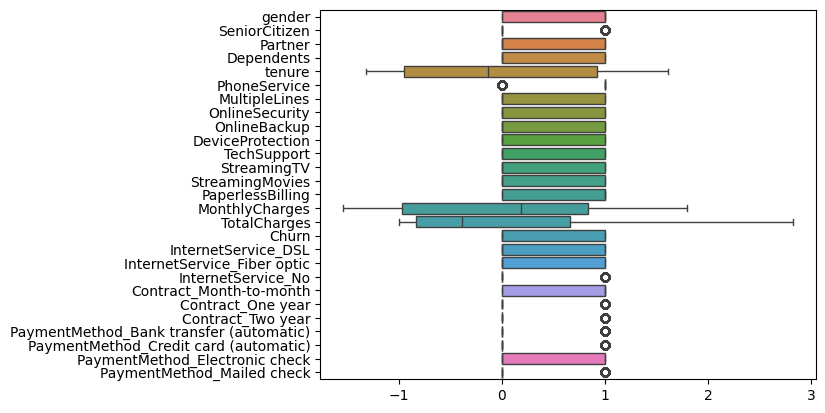

In [ ]:
bPlot(df)

In [ ]:
x= df.drop(columns=["Churn"])
y= df.Churn

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30,
)

v_train,x_test,v_test,y_test = train_test_split(
    x_test,y_test,test_size=0.5
)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
output['RandomForest'][A] = accuracy_score(y_test, y_pred)
output["RandomForest"][P] = precision_score(y_test, y_pred)
output["RandomForest"][R] = recall_score(y_test, y_pred)
output["RandomForest"][F] = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       782
           1       0.66      0.55      0.60       275

    accuracy                           0.81      1057
   macro avg       0.76      0.73      0.74      1057
weighted avg       0.80      0.81      0.80      1057

[[704  78]
 [123 152]]


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
output['LogisticRegression'][A] = accuracy_score(y_test, y_pred)
output["LogisticRegression"][P] = precision_score(y_test, y_pred)
output["LogisticRegression"][R] = recall_score(y_test, y_pred)
output["LogisticRegression"][F] = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       782
           1       0.66      0.57      0.61       275

    accuracy                           0.81      1057
   macro avg       0.76      0.73      0.74      1057
weighted avg       0.80      0.81      0.81      1057

confusion_matrix
[[702  80]
 [119 156]]


# KNN Classifier

In [ ]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
y_pred = kn.predict(x_test)
print(classification_report(y_test, y_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
output['KNN'][A] = accuracy_score(y_test, y_pred)
output["KNN"][P] = precision_score(y_test, y_pred)
output["KNN"][R] = recall_score(y_test, y_pred)
output["KNN"][F] = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       782
           1       0.57      0.57      0.57       275

    accuracy                           0.78      1057
   macro avg       0.71      0.71      0.71      1057
weighted avg       0.78      0.78      0.78      1057

confusion_matrix
[[662 120]
 [117 158]]


# Support Vector Classifier

In [ ]:
model = SVC()
model.fit(x_train,y_train)
preds = model.predict(x_test)
print(classification_report(y_test, preds))
print("confusion_matrix")
print(confusion_matrix(y_test, preds))
output['SVM'][A] = accuracy_score(y_test, preds)
output["SVM"][P] = precision_score(y_test, preds)
output["SVM"][R] = recall_score(y_test, preds)
output["SVM"][F] = f1_score(y_test, preds)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       782
           1       0.66      0.55      0.60       275

    accuracy                           0.81      1057
   macro avg       0.76      0.72      0.74      1057
weighted avg       0.80      0.81      0.80      1057

confusion_matrix
[[706  76]
 [125 150]]


# Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
print(classification_report(y_test, y_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
output['DecisionTree'][A] = accuracy_score(y_test, y_pred)
output["DecisionTree"][P] = precision_score(y_test, y_pred)
output["DecisionTree"][R] = recall_score(y_test, y_pred)
output["DecisionTree"][F] = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       782
           1       0.50      0.56      0.53       275

    accuracy                           0.74      1057
   macro avg       0.67      0.68      0.68      1057
weighted avg       0.75      0.74      0.74      1057

confusion_matrix
[[627 155]
 [120 155]]


# Naive Bayes Classifier

## GaussianNB

In [ ]:
g_model = GaussianNB()
g_model.fit(x_train,y_train)
y_pred = g_model.predict(x_test)
print(classification_report(y_test, y_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
output['GaussianNB'][A] = accuracy_score(y_test, y_pred)
output["GaussianNB"][P] = precision_score(y_test, y_pred)
output["GaussianNB"][R] = recall_score(y_test, y_pred)
output["GaussianNB"][F] = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       782
           1       0.51      0.79      0.62       275

    accuracy                           0.74      1057
   macro avg       0.71      0.76      0.71      1057
weighted avg       0.80      0.74      0.76      1057

confusion_matrix
[[570 212]
 [ 58 217]]


## MultinomialNB

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

x_train_m = scale.fit_transform(x_train)
x_test_m = scale.transform(x_test)

m_model = MultinomialNB()

m_model.fit(x_train_m,y_train)
y_pred = m_model.predict(x_test_m)
print(classification_report(y_test, y_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
output['MultinomialNB'][A] = accuracy_score(y_test, y_pred)
output["MultinomialNB"][P] = precision_score(y_test, y_pred)
output["MultinomialNB"][R] = recall_score(y_test, y_pred)
output["MultinomialNB"][F] = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       782
           1       0.56      0.64      0.59       275

    accuracy                           0.77      1057
   macro avg       0.71      0.73      0.72      1057
weighted avg       0.79      0.77      0.78      1057

confusion_matrix
[[641 141]
 [ 99 176]]


## BernoulliNB

In [ ]:

X_train_bin, X_test_bin = x_train.copy(), x_test.copy()

for col in X_train_bin.columns:
    X_train_bin[col] = X_train_bin[col].apply(lambda x: 1 if x > X_train_bin[col].mean() else 0)
    X_test_bin[col] = X_test_bin[col].apply(lambda x: 1 if x > X_train_bin[col].mean() else 0)

X_train_bin.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1280,0,1,1,0,1,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
4843,1,0,1,1,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2057,0,0,1,0,0,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4444,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1190,1,0,0,0,1,1,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
b_model = BernoulliNB()
b_model.fit(X_train_bin,y_train)
y_pred = b_model.predict(X_test_bin)
print(classification_report(y_test, y_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
output['BernoulliNB'][A] = accuracy_score(y_test, y_pred)
output["BernoulliNB"][P] = precision_score(y_test, y_pred)
output["BernoulliNB"][R] = recall_score(y_test, y_pred)
output["BernoulliNB"][F] = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.79      0.84       782
           1       0.54      0.70      0.61       275

    accuracy                           0.77      1057
   macro avg       0.71      0.75      0.72      1057
weighted avg       0.79      0.77      0.78      1057

confusion_matrix
[[620 162]
 [ 83 192]]


# ANN

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6995 - loss: 0.5783
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 0.4517
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7834 - loss: 0.4390
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7908 - loss: 0.4288
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8060 - loss: 0.4237
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8078 - loss: 0.4153
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 0.4143
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8050 - loss: 0.4097
Epoch 9/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4210
Epoch 10/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.4083
Epoch 11/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8135 - loss: 0.4101
Epoch 12/100
155/155 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred = model.predict(x_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred]
print(classification_report(y_test, y_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
output['ANN'] = {}
output['ANN'][A] = accuracy_score(y_test, y_pred)
output["ANN"][P] = precision_score(y_test, y_pred)
output["ANN"][R] = recall_score(y_test, y_pred)
output["ANN"][F] = f1_score(y_test, y_pred)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       782
           1       0.65      0.63      0.64       275

    accuracy                           0.81      1057
   macro avg       0.76      0.75      0.76      1057
weighted avg       0.81      0.81      0.81      1057

confusion_matrix
[[687  95]
 [102 173]]


# All with Cross Valdiatioin

In [ ]:
def drawSubplot(name,data):
    plt.title(f"{name} all tests")
    plt.bar(data["params"],data["mean_test_score"])
    plt.show()





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[1 0 0 ... 1 1 0]
------------------------------------------------------------------------------------------------------------------------------------------------
Model: Random Forest
Test Accuracy: 0.9686544342507645 %
    mean_test_score                                             params
0          0.942617  {'criterion': 'gini', 'max_depth': None, 'max_...
1          0.944529  {'criterion': 'gini', 'max_depth': None, 'max_...
2          0.946634  {'criterion': 'gini', 'max_depth': None, 'max_...
3          0.947016  {'criterion': 'gini', 'max_depth': None, 'max_...
4          0.948546  {'criterion': 'gini', 'max_depth': None, 'max_...
..              ...                                                ...
76         0.948546  {'criterion': 'log_loss', 'max_depth': 20, 'ma...
77         0.949503  {'criterion': 'log_loss', 'max_depth': 20, 'ma...
78         0.937261  {'criterion': 'log_loss', 'max_depth': 20, 'ma...
79         0.935539  {'criterion': 'log_loss', 'max_depth': 20, 'ma...

<Figure size 2500x800 with 0 Axes>

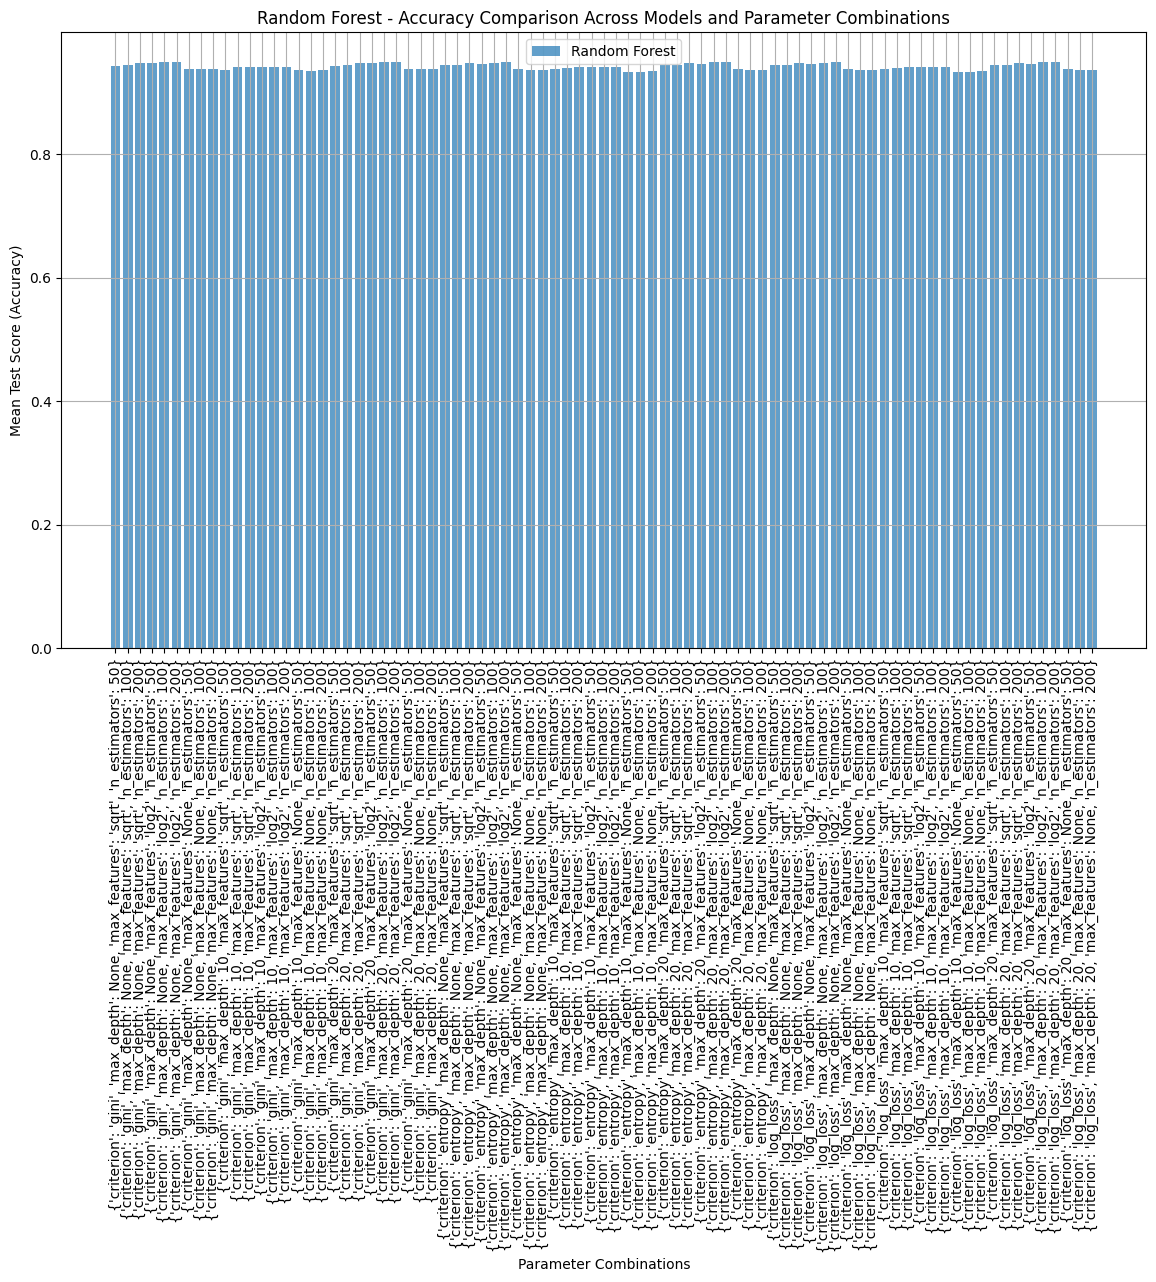

Best parameter : {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


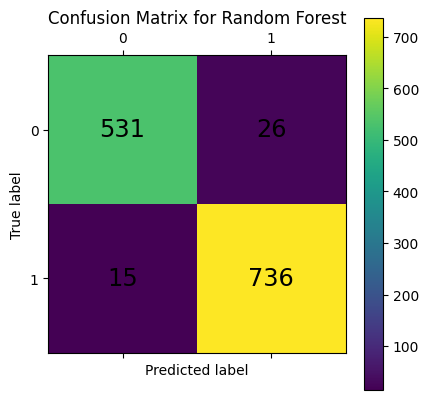

[1 0 0 ... 1 1 0]
------------------------------------------------------------------------------------------------------------------------------------------------
Model: Support Vector Machine
Test Accuracy: 0.9610091743119266 %
    mean_test_score                                             params
0          0.908378   {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
1          0.916220     {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
2          0.902257      {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
3          0.876435  {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
4          0.908378    {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
5          0.874331      {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
6          0.896327       {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
7          0.882555   {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
8          0.918516     {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
9          0.929801       {'C': 1, 'gamma': 'scale', 'kernel'

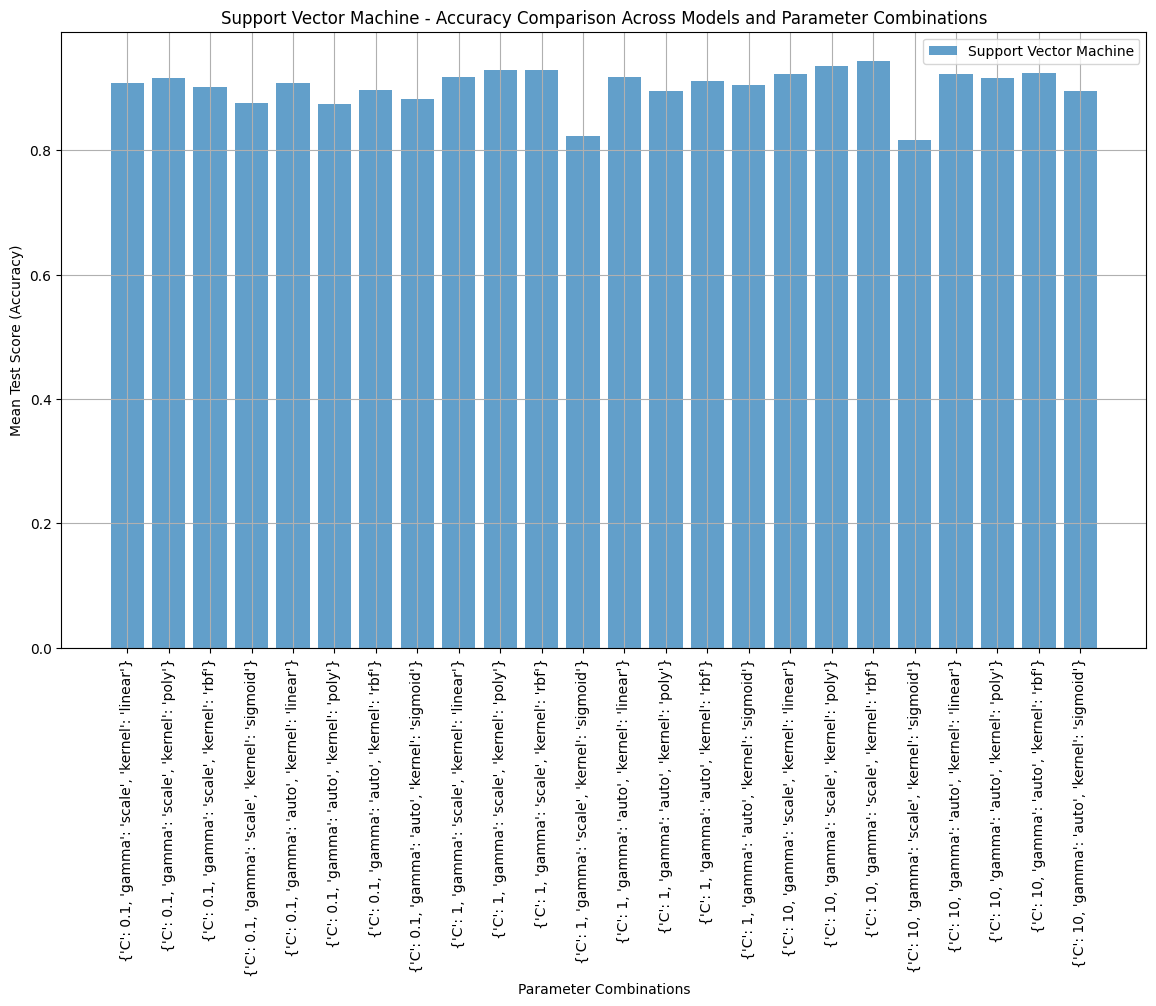

Best parameter : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


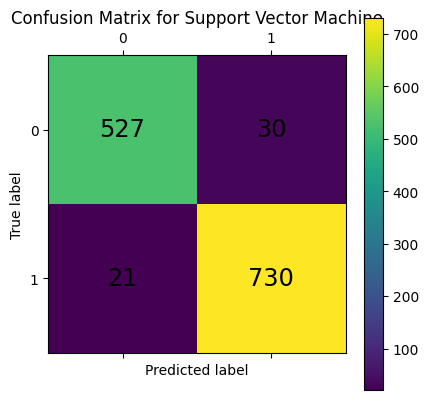

[1 0 0 ... 1 0 0]
------------------------------------------------------------------------------------------------------------------------------------------------
Model: Logistic Regression
Test Accuracy: 0.9380733944954128 %
   mean_test_score                       params
0         0.906465  {'C': 0.1, 'penalty': 'l2'}
1         0.914499    {'C': 1, 'penalty': 'l2'}
2         0.922724   {'C': 10, 'penalty': 'l2'}


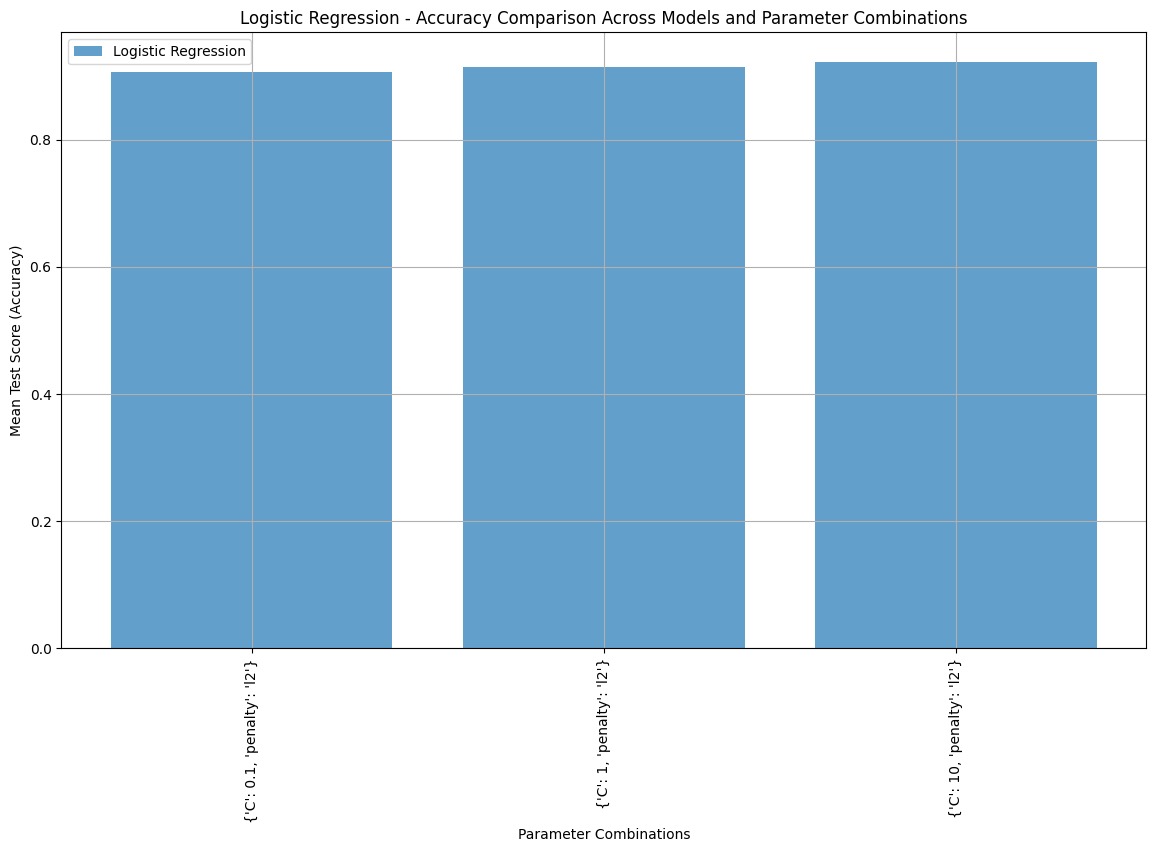

Best parameter : {'C': 10, 'penalty': 'l2'}


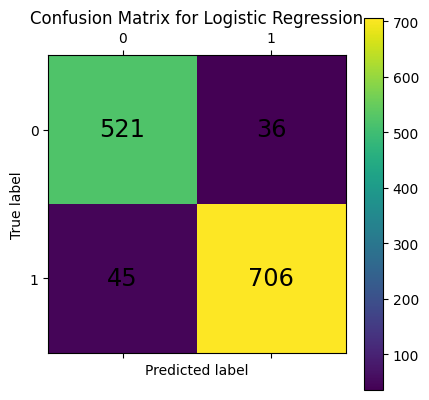

[1 0 0 ... 1 1 0]
------------------------------------------------------------------------------------------------------------------------------------------------
Model: K-Nearest Neighbors
Test Accuracy: 0.9655963302752294 %
    mean_test_score                                             params
0          0.939556  {'algorithm': 'auto', 'n_neighbors': 3, 'weigh...
1          0.945103  {'algorithm': 'auto', 'n_neighbors': 3, 'weigh...
2          0.929036  {'algorithm': 'auto', 'n_neighbors': 5, 'weigh...
3          0.940130  {'algorithm': 'auto', 'n_neighbors': 5, 'weigh...
4          0.926741  {'algorithm': 'auto', 'n_neighbors': 7, 'weigh...
5          0.939365  {'algorithm': 'auto', 'n_neighbors': 7, 'weigh...
6          0.939556  {'algorithm': 'ball_tree', 'n_neighbors': 3, '...
7          0.945103  {'algorithm': 'ball_tree', 'n_neighbors': 3, '...
8          0.929036  {'algorithm': 'ball_tree', 'n_neighbors': 5, '...
9          0.940130  {'algorithm': 'ball_tree', 'n_neighbors': 5

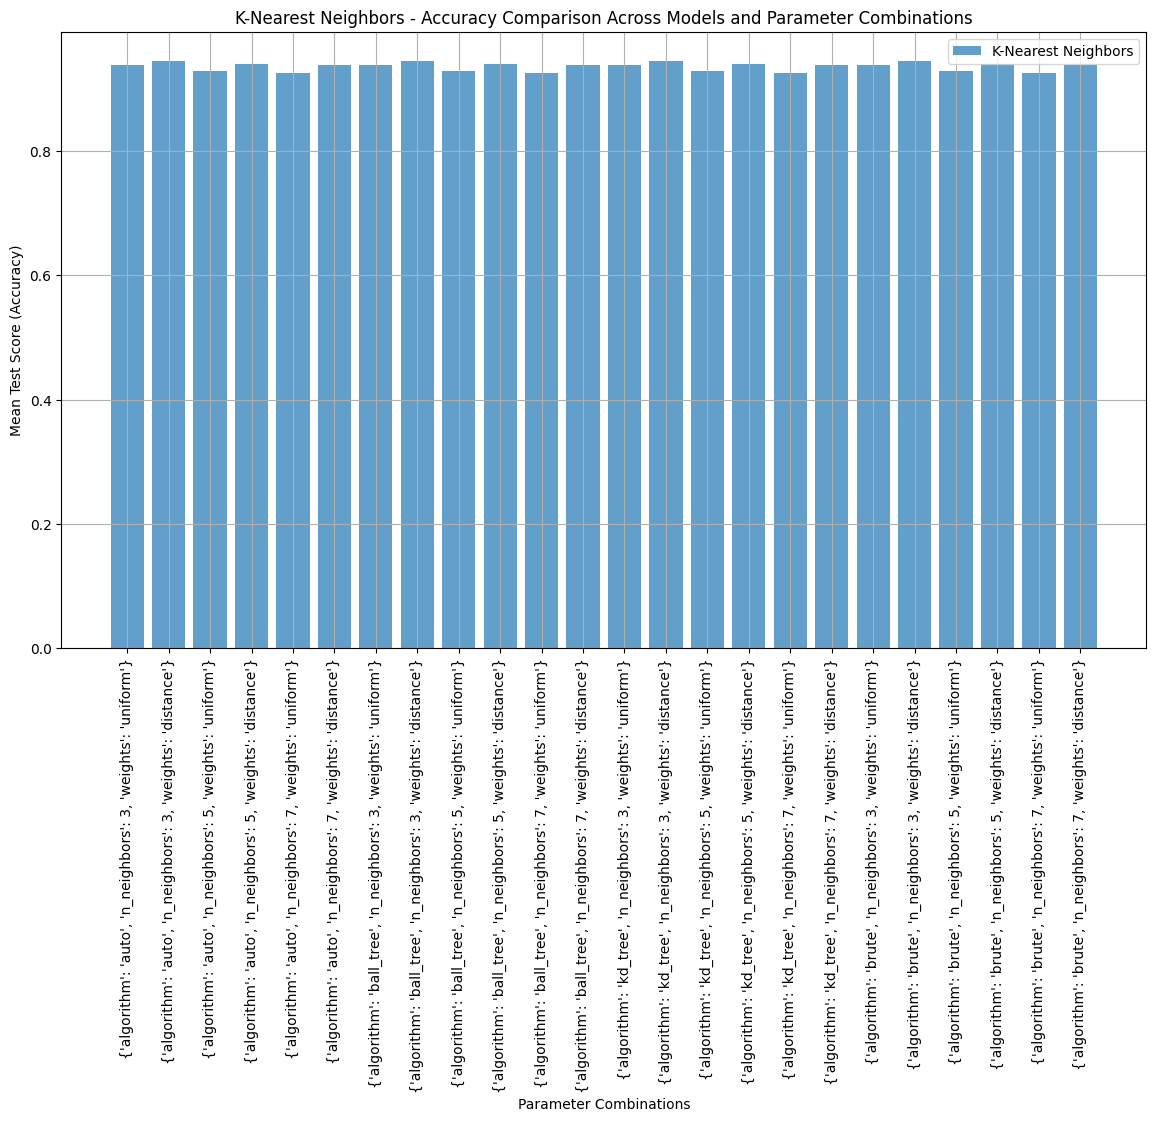

Best parameter : {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


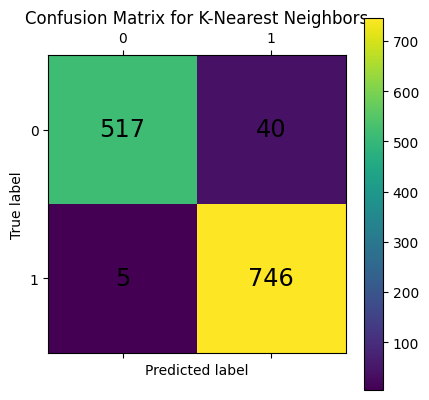

[1 0 0 ... 1 1 0]
------------------------------------------------------------------------------------------------------------------------------------------------
Model: Decision Tree
Test Accuracy: 0.9434250764525994 %
    mean_test_score                                             params
0          0.917177  {'criterion': 'gini', 'max_depth': None, 'min_...
1          0.920237  {'criterion': 'gini', 'max_depth': None, 'min_...
2          0.910099  {'criterion': 'gini', 'max_depth': None, 'min_...
3          0.912395  {'criterion': 'gini', 'max_depth': None, 'min_...
4          0.904170  {'criterion': 'gini', 'max_depth': None, 'min_...
5          0.907613  {'criterion': 'gini', 'max_depth': None, 'min_...
6          0.915455  {'criterion': 'gini', 'max_depth': 10, 'min_sa...
7          0.917559  {'criterion': 'gini', 'max_depth': 10, 'min_sa...
8          0.910291  {'criterion': 'gini', 'max_depth': 10, 'min_sa...
9          0.919090  {'criterion': 'gini', 'max_depth': 10, 'min_sa...

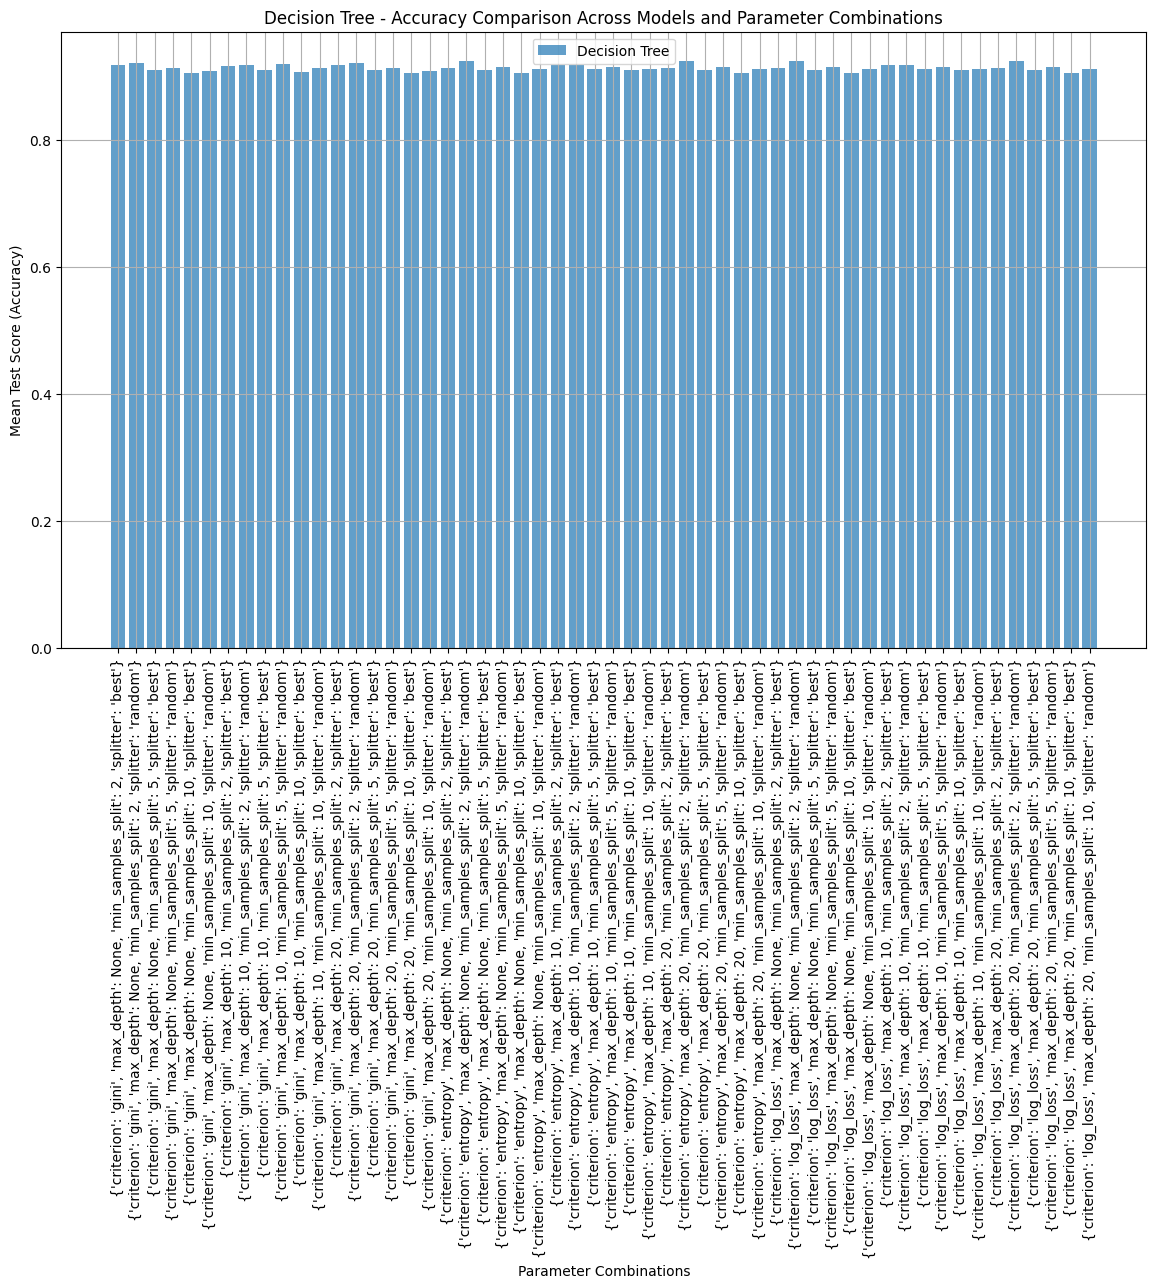

Best parameter : {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'random'}


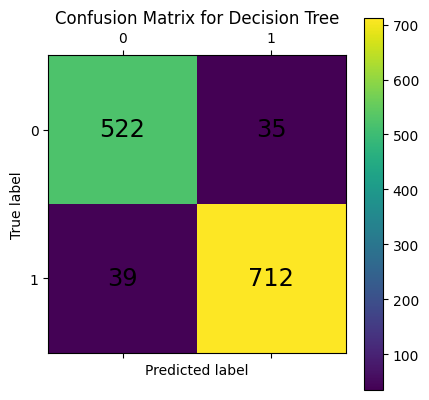

[1 0 0 ... 1 0 0]
------------------------------------------------------------------------------------------------------------------------------------------------
Model: Naive Bayes GaussianNB
Test Accuracy: 0.9113149847094801 %
   mean_test_score params
0         0.891737     {}


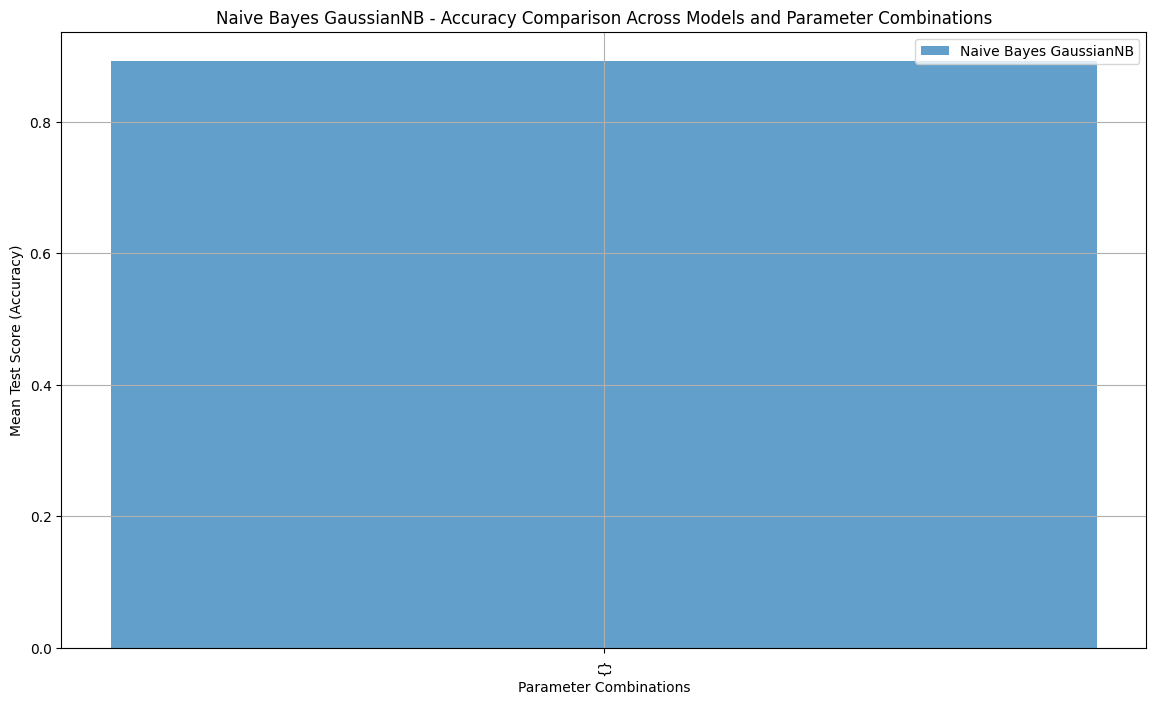

Best parameter : {}


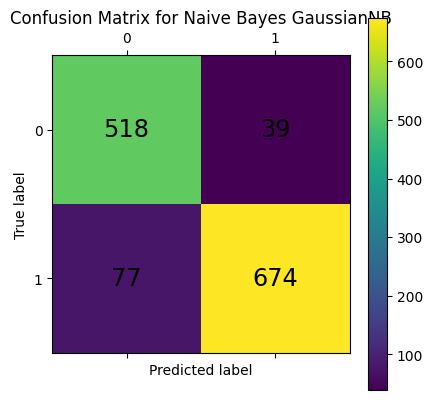

[1 0 0 ... 1 0 0]
------------------------------------------------------------------------------------------------------------------------------------------------
Model: Naive Bayes MultinomialNB
Test Accuracy: 0.9120795107033639 %
   mean_test_score params
0         0.898049     {}


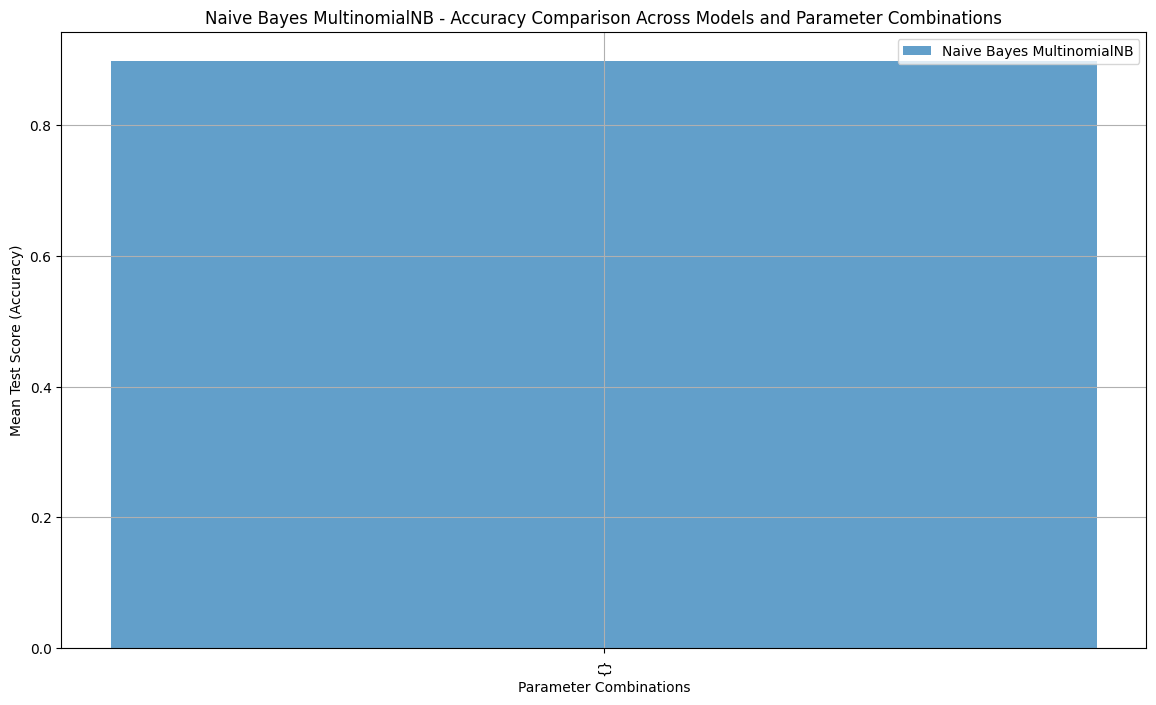

Best parameter : {}


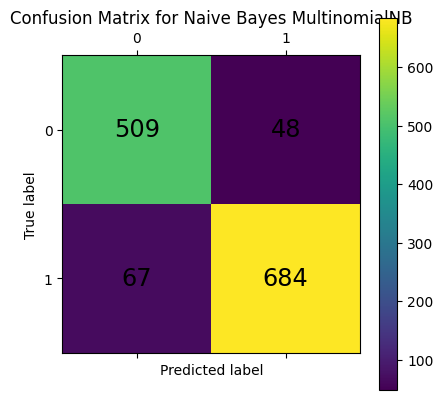

[1 0 0 ... 1 1 0]
------------------------------------------------------------------------------------------------------------------------------------------------
Model: Naive Bayes BernoulliNB
Test Accuracy: 0.9151376146788991 %
   mean_test_score params
0         0.895945     {}


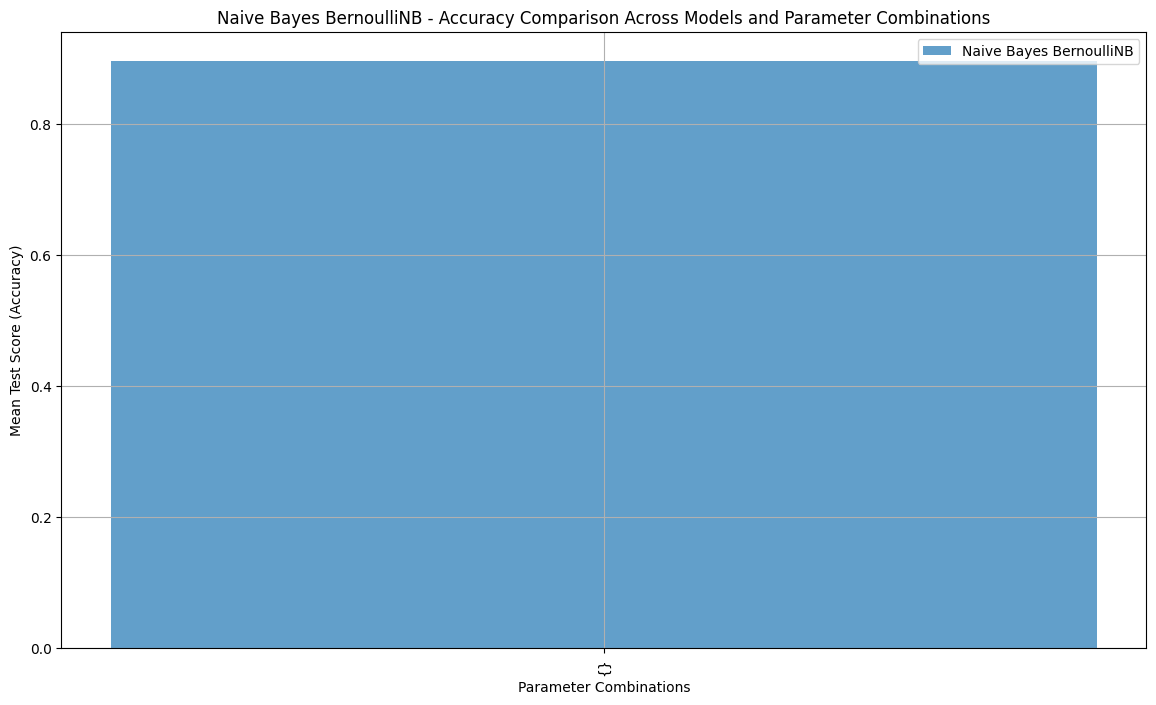

Best parameter : {}


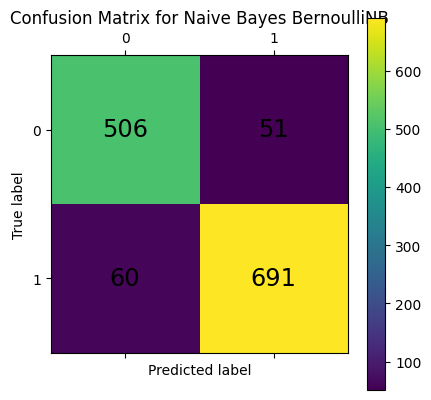

Best Model:
Test Accuracy: 0.9686544342507645
Model Pipeline: RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200, random_state=42) with accuracy 0.9686544342507645 %


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint


sm = SMOTEENN()
X_res, y_res = sm.fit_resample(x, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)
Annmodel = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
Annmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
plt.figure(figsize=(25, 8))
models = [
    # ('ANN',Annmodel,{})
    # ,
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         "criterion":["gini", "entropy", "log_loss"],
         'max_features': ['sqrt', 'log2', None],
         'max_depth': [None, 10, 20]}),

    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         "kernel":["linear", "poly", "rbf", "sigmoid"],
         'gamma': ['scale', 'auto']}),

    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l2']}),

    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'weights': ['uniform', 'distance']}),

    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         "criterion":["gini", "entropy", "log_loss"],
         'splitter': ['best', 'random'],
         'min_samples_split': [2, 5, 10]}),

    ('Naive Bayes GaussianNB', GaussianNB(), {}),
    ('Naive Bayes MultinomialNB', MultinomialNB(), {}),
    ('Naive Bayes BernoulliNB', BernoulliNB(), {}),


]

best_model = None
best_accuracy = 0.0
prefix = "P_"
summary_df = pd.DataFrame(columns=['Model', 'Mean Test Score', 'Parameters'])
mn = MinMaxScaler()
Xr_train = mn.fit_transform(Xr_train)
Xr_test = mn.transform(Xr_test)
for name, model, param_grid in models:
    summary_df = pd.DataFrame(columns=['Model', 'Mean Test Score', 'Parameters'])

    output[prefix+name] ={}



    grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
    grid_search.fit(Xr_train, yr_train)
    pipeline = grid_search.best_estimator_
    result = pd.DataFrame(grid_search.cv_results_)
    result['Model'] = name  # Add the model name for easier filtering

    # Append the results to the summary DataFrame
    summary_df = pd.concat([summary_df, result[['Model', 'mean_test_score', 'params']]])
    pipeline.fit(Xr_train, yr_train)

    y_pred = pipeline.predict(Xr_test)
    print(y_pred)

    accuracy = accuracy_score(yr_test, y_pred)
    print("------------------------------------------------------------------------------------------------------------------------------------------------")

    print("Model:", name)
    print("Test Accuracy:", accuracy,"%")
    print(result[["mean_test_score","params"]])
    plt.figure(figsize=(14, 8))
    models_unique = summary_df['Model'].unique()

    for model_name in models_unique:
        model_data = summary_df[summary_df['Model'] == model_name]
        plt.bar(model_data['params'].astype(str), model_data['mean_test_score'], label=model_name, alpha=0.7)

    plt.xlabel('Parameter Combinations')
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.title(f'{name} - Accuracy Comparison Across Models and Parameter Combinations')
    plt.legend()
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

    print("Best parameter :",grid_search.best_params_)
    output[prefix+name][A] = accuracy
    output[prefix+name][P] = precision_score(yr_test, y_pred)
    output[prefix+name][R] = recall_score(yr_test, y_pred)
    output[prefix+name][F] = f1_score(yr_test, y_pred)



    conf_matrix = confusion_matrix(yr_test, y_pred)
    plt.matshow(conf_matrix)
    plt.title(f"Confusion Matrix for {name}")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.show()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline


print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy, "%")

# Summery Of output

In [ ]:
output_df = pd.DataFrame.from_dict(output)
output_df.T.style.background_gradient(vmax=1,vmin=0.40,cmap="RdYlBu")

,Recall,Precision,f1-score,Accuracy
RandomForest,0.552727,0.660870,0.601980,0.809839
LogisticRegression,0.567273,0.661017,0.610568,0.811731
SVM,0.545455,0.663717,0.598802,0.809839
DecisionTree,0.563636,0.500000,0.529915,0.739830
KNN,0.574545,0.568345,0.571429,0.775781
GaussianNB,0.789091,0.505828,0.616477,0.744560
MultinomialNB,0.640000,0.555205,0.594595,0.772942
BernoulliNB,0.698182,0.542373,0.610493,0.768212
ANN,0.629091,0.645522,0.637201,0.813623
P_Random Forest,0.980027,0.965879,0.972902,0.968654
